# Performing Linear Regression on Advertising dataset

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [5]:
data = pd.read_csv('Advertising.csv', index_col=0)
display (data.head())
data.columns = ['TV', 'Radio', 'Newspaper', "Sales"]

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Indepedent variables**
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

**Target Variable**
- Sales: sales of a single product in a given market (in thousands of widgets)

In [6]:
data.shape

(200, 4)

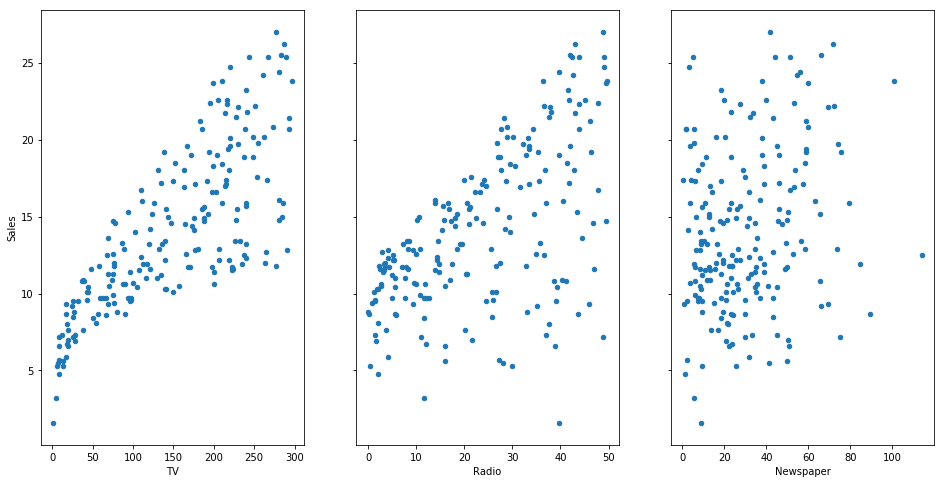

In [8]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

On the basis of this data, how should you spend advertising money in the future?
These general questions might lead you to more specific questions:

1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending, can sales be predicted?

Exploring these questions below.

## Model Building

In [10]:
# create X and y

feature_cols = ["TV"]
X = data[feature_cols]
y = data.Sales

In [12]:
X[:5]
y[:5]

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [14]:
# sklearn - import, instantiate and fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

# print intercept and coefficients
print(lm.intercept_) #B0
print(lm.coef_) #B1


7.032593549127693
[0.04753664]


Sales = 7.03259 + 0.04753664*TV

## Interpreting Model Coefficients

How do you interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending was **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads was **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. How would you predict the sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [16]:
Sales_50 = 7.03259 + 0.04753664*50
Sales_50

9.409422

The prediction would be sales of 9409 widgets in the market

In [17]:
Sales_0 = 7.03259 + 0.04753664*0
Sales_0

7.03259

In [18]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()
lm.predict(X_new) #7.03259 + 0.04753664*50

array([9.40942557])

In [20]:
# R-squared
from sklearn.metrics import r2_score
print(r2_score(y,lm.predict(X)))

0.611875050850071


61% variablity in the Sales Amount is explained by the TV Advertising Budget

In [22]:
mse = mean_squared_error(y, lm.predict(X))
rmse = sqrt(mse)
print(rmse)

3.2423221486546887


RMSE = 3242 widgets

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

R-sqaured high, RMSE - low

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [54]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

In [55]:
X[:5]

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [56]:
y[:5]

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [57]:
#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42) 
# random_state - it helps in getting same sample of data

In [58]:
print (xtrain[:5])
# print (xtest[:5])
# print (ytrain[:5])
# print (ytest[:5])

        TV  Radio  Newspaper
170  284.3   10.6        6.4
98   184.9   21.0       22.0
32   112.9   17.4       38.6
13    23.8   35.1       65.9
36   290.7    4.1        8.5


In [59]:
#using train, test datasets

lm = LinearRegression()
lm.fit(xtrain, ytrain)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

#predictions  on test dataset
predictions = lm.predict(xtest)

print(sqrt(mean_squared_error(ytest, predictions)))
from sklearn.metrics import r2_score
print (r2_score(ytest, predictions))

2.70894909251591
[0.04405928 0.1992875  0.00688245]
1.9485372043446387
0.8609466508230368


Sales = 2.976017197642026 + 0.04400994 * TV  + 0.19896039 * Radio - 0.0009451 * Newspaper

How to interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** was associated with an **increase in Sales of 44 widgets**.


In [60]:
y_pred = lm.predict(xtest)

In [61]:
print(r2_score(ytest,y_pred))
print (sqrt(mean_squared_error(ytest,y_pred)))

0.8609466508230368
1.9485372043446387


In [62]:
# create X and y
feature_cols = ['TV', 'Radio']#, 'Newspaper']
X = data[feature_cols]
y = data.Sales

#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42) 
# random_state - it helps in getting same sample of data

#using train, test datasets

lm = LinearRegression()
lm.fit(xtrain, ytrain)

#predictions  on test dataset
predictions = lm.predict(xtest)

print(sqrt(mean_squared_error(ytest, predictions)))
from sklearn.metrics import r2_score
print (r2_score(ytest, predictions))

1.9154756731764255
0.8656253548947075


In [63]:
# create X and y
feature_cols = ['TV', 'Newspaper']
X = data[feature_cols]
y = data.Sales

#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42) 
# random_state - it helps in getting same sample of data

#using train, test datasets

lm = LinearRegression()
lm.fit(xtrain, ytrain)

#predictions  on test dataset
predictions = lm.predict(xtest)

print(sqrt(mean_squared_error(ytest, predictions)))
from sklearn.metrics import r2_score
print (r2_score(ytest, predictions))

3.006590307424541
0.6689355450060159


In [64]:
# create X and y
feature_cols = ["Radio", 'Newspaper']
X = data[feature_cols]
y = data.Sales

#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42) 
# random_state - it helps in getting same sample of data

#using train, test datasets

lm = LinearRegression()
lm.fit(xtrain, ytrain)

#predictions  on test dataset
predictions = lm.predict(xtest)

print(sqrt(mean_squared_error(ytest, predictions)))
from sklearn.metrics import r2_score
print (r2_score(ytest, predictions))

4.873972921708707
0.129977923450051
